# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats

In [2]:
# PRUEBAS A PRIORI PARA T-STUDENT

#1 Las muestras deben seguir una distribución normal (Prueba de normalidad): 

Diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5] #Lista de datos grupo 1
Diet2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2] #Lista de datos grupo 2

print(stats.shapiro(Diet1)[1])
print(stats.shapiro(Diet2)[1])

0.9635409177367069
0.5905246580529597


Análisis prueba de normalidad: siendo el p value del grupo de la Dieta 1 y el grupo de la Dieta 2 un valor alto, podríamos suponer que la distribución de donde proviene la muestra sigue la normalidad. No rechazamos la hipótesis nula presuponiendo que la distribución de ambas es normal. 

In [3]:
#2 Prueba de varianzas muestrales. Para hacer un T-student debemos suponer que la dispersión de sus datos son similares.

print(stats.levene(Diet1, Diet2).pvalue)

0.15767770055358


Análisis de comparación de varianzas (Levene) : Al ser éste un valor superior a 0.05, no podemos rechazar la hipótesis nula, asumiendo así que las varianzas entre ambos grupos no son distintas.

In [4]:
#3 Prueba T-Student para comparación de medias muestrales:

#Hipótesis nula : La media de las muestras son iguales
#Hipótesis alternativa : La media de las muestras no son iguales 

#Test de hipótesis
t_stat, p_value = stats.ttest_ind(Diet1, Diet2)

# Definir el nivel alpha:
nivel_alpha = 0.05

print(f'Valor de T :{t_stat}')
print(f'Probabilidad asociada al t: {p_value}')

#Comparación del p_value asociado al test con el valor alpha (confianza)
if p_value < nivel_alpha:
    print('Rechazamos hipótesis nula, asumiendo que las medias de las muestras no son similares')
    print('Existe una diferencia estadísticamente significativa entre las dietas aplicadas entre el grupo Dieta 1 y Dieta 2')
else:
    print('No podemos rechazar la hipótesis nula')
    print('No hay evidencia estadística suficiente para que exista diferencia entre el grupo Dieta 1 y Dieta 2')

Valor de T :-3.5383407969933938
Probabilidad asociada al t: 0.004083270191713912
Rechazamos hipótesis nula, asumiendo que las medias de las muestras no son similares
Existe una diferencia estadísticamente significativa entre las dietas aplicadas entre el grupo Dieta 1 y Dieta 2


In [5]:
#Comparación de medias sabiendo que existe diferencia significativa :

mean_diet1 = np.mean(Diet1)
mean_diet2 = np.mean(Diet2)

print(mean_diet1)
print(mean_diet2)

2.542857142857143
3.0285714285714285


**CONCLUSIONES:**
De acuerdo a las características de los pacientes y el criterio profesional en cuanto a la aplicación de ambas dietas, si el propósito finalmente es la pérdida de peso, podríamos inferir que la Dieta 2 es mejor. Sin embargo, considero que estaría sujeta a otros tipos de investigaciones en función de las personas que se someten a la misma, dado que la pérdida de peso en exceso o muy acelerada también podría ser contraproducente. 

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

In [6]:
#Datos para análisis:

fert1 = [20,21,20,19,20]
fert2= [22,21,23,22,21]
fert3 = [24,23,22,23,24]

#PRUEBAS A PRIORI PARA ANOVA :

#1 Prueba de Normalidad : Test Shapiro (puesto que el n es muy pequeño)

print("Shapiro-Wilk p-value para Fertilizante 1:", stats.shapiro(fert1).pvalue)
print("Shapiro-Wilk p-value para Fertilizante 2:", stats.shapiro(fert2).pvalue)
print("Shapiro-Wilk p-value para Fertilizante 3:", stats.shapiro(fert3).pvalue)

Shapiro-Wilk p-value para Fertilizante 1: 0.32542950716414576
Shapiro-Wilk p-value para Fertilizante 2: 0.3140395561440371
Shapiro-Wilk p-value para Fertilizante 3: 0.3140395561440371


H0 = la muestra proviene de una población cuya distribución es normal.
H1 = la muestra proviene de una problación cuya distribución no es normal.

*Análisis de la prueba de normalidad:* los p_value de cada muestra de fertilizantes resultaron ser altos (mayores a 0.05), por ende, no se rechaza la hipótesis nula. Las muestras provienen de una población cuya distribución es normal.

In [7]:
#2 Prueba de homogeneidad de varianzas (Levene):

print(stats.levene(fert1, fert2, fert3).pvalue)

0.8039599174006208


H0 = No hay diferencias en las varianzas de cada muestra.
H1 = Existen diferencias en las varianzas de las muestras.

*Análisis prueba de homogeneidad:* El p_value resultante es mayor a 0.05, por lo tanto, no se puede rechazar la hipótesis nula, lo que nos lleva a inferir que las varianzas de los grupos muestrales no existen diferencias significativas.

In [8]:
#3 Prueba ANOVA para evaluar la independencia entre los fertilizantes y el rendimiento del maíz:

f_stat, p_value = stats.f_oneway(fert1, fert2, fert3) #Anova - One way porque es a medir en una sola condición.

print(f"Valor de F: {f_stat}")
print(f"valor P-asociado: {p_value}")

if p_value < nivel_alpha:
     print("Se rechaza la hipótesis nula, al menos uno de los fertilizantes genera una media de rendimiento diferente al resto")
else:
    print("No se rechaza la hipótesis nula, por ende, la media de rendimiento de los fertilizantes no tiene diferencias significativas")

Valor de F: 20.315789473684188
valor P-asociado: 0.00014047824793190472
Se rechaza la hipótesis nula, al menos uno de los fertilizantes genera una media de rendimiento diferente al resto


H0 = Las medias del rendimiento del maíz no son diferentes entre los tres fertilizantes. Lo que supone que todos los fertilizantes producen el mismo rendimiento de maíz en promedio.
H1 = Al menos un fertilizante produce un rendimiento de maíz significativamente diferente de los otros.

*Análisis prueba de ANOVA:* dado el valor del estadístico F, que es grande, nos permite ya determinar que la variabilidad entre fertilizantes es mayor que la variabilidad dentro de cada uno de ellos, siendo probable que las diferencias en los rendimientos de maíz entre los fertilizantes no sean debidas al azar. El resultado del p_value (menor a 0,05) confirma que existen diferencias estadísticamente entre ellos y que al menos uno de ellos produce un rendimiento de maiz significativamente diferente.

In [9]:
#4 Creamos arrays a partir de los datos para graficar resultados:
data = {
    'Fertilizante 1': fert1,
    'Fertilizante 2': fert2,
    'Fertilizante 3': fert3
}
df = pd.DataFrame(data)
df

,Fertilizante 1,Fertilizante 2,Fertilizante 3
0,20,22,24
1,21,21,23
2,20,23,22
3,19,22,23
4,20,21,24


<function matplotlib.pyplot.show(close=None, block=None)>

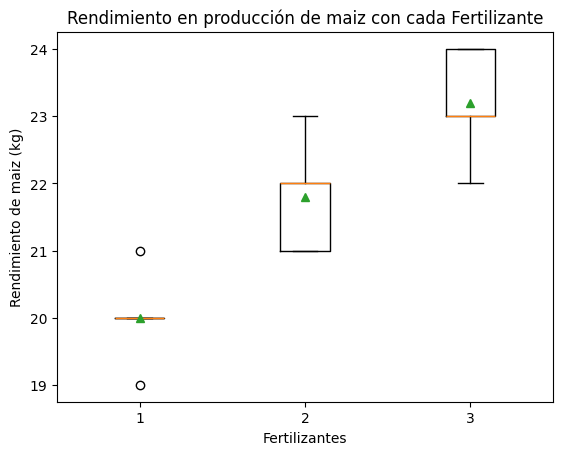

In [10]:
# Métodos de graficación

plt.boxplot(df, showmeans= True)
plt.title('Rendimiento en producción de maiz con cada Fertilizante')
plt.xlabel('Fertilizantes')
plt.ylabel('Rendimiento de maiz (kg)')
plt.show

Dado el gráfico creado, es posible observar que las distribuciones de los fertilizantes 2 y 3 son similares entre ellas (la forma de dispersión de datos) a pesar de ser el fertilizante 3 quien genera, aparentemente, mayor rendimiento en la producción de maíz. Sin embargo, el fertilizante 1 mantiene sus elementos de dispersión fuera del alcance del comportamiento de los otros dos, sugiriendo que es el que genera menor rendimiento de la producción de maiz, siendo bastante probable que éste sea el diferente estadísticamente. Se deberá realizar una prueba post-hoc para certificarlo.

## Ejercicio 3

 Supongamos que una empresa de la industria del café afirma que su peso medio del paquete de café es de 500 gramos. Recoges una muestra de 30 paquetes para testar esta afirmación. Utiliza la prueba t de una muestra para evaluar si la media poblacional es realmente de 500 gramos con un nivel de significancia del 0.05.

In [11]:
muestras = [507.84, 488.19, 501.65, 494.70,
           479.79, 505.65, 500.42, 503.53,
           486.65 , 505.63, 486.26, 498.87,
           490.56, 502.16 , 491.24 , 506.23,
           503.81, 493.83, 509.51, 491.74,
           488.10 , 496.29 , 501.80, 490.73,
           493.97, 486.00, 498.68, 498.72,
           473.91, 483.49]

In [12]:
# PRUEBAS A PRIORI PARA T-STUDENT

#Pruebas de normalidad Shapiro Wilk:

stat, p_value = stats.shapiro(muestras)

print(f"Estadístico W: {stat}")
print(f"Valor_p: {p_value}")

if p_value < nivel_alpha:
    print("Se rechaza la hipótesis nula, los datos no cumplen con una distribución normal")
else:
    print("No se rechaza la hipótesis nula, los datos provienen de una distribución normal")


Estadístico W: 0.9695730337789565
Valor_p: 0.5275588709521144
No se rechaza la hipótesis nula, los datos provienen de una distribución normal


In [13]:
# Prueba T-student que compara la distribución de una población con un valor fijo.

t_stat, p_valor = stats.ttest_1samp(muestras, 500)

print('Valor t:', t_stat)
print('P-valor:', p_valor)

# Realizar la prueba de hipótesis
if p_valor < nivel_alpha:
    print("Rechazamos la hipótesis nula.")
    print("Hay evidencia estadística significativa de que existe una diferencia entre el peso medio de la muestra y el que afirma la empresa.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia estadística suficiente para afirmar que exista una diferencia entre el peso medio de la muestra y el peso que afirma la empresa.")

Valor t: -2.880518471640414
P-valor: 0.0073921556988829715
Rechazamos la hipótesis nula.
Hay evidencia estadística significativa de que existe una diferencia entre el peso medio de la muestra y el que afirma la empresa.


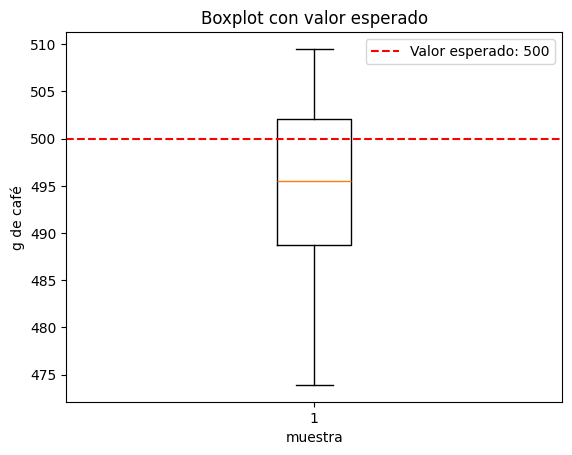

In [19]:
#4 Método de graficación para mostrar lo comprobado:

plt.boxplot(muestras)
plt.axhline(y = 500, color='r', linestyle='--', label='Valor esperado: 500')
plt.title("Boxplot con valor esperado")
plt.xlabel('muestra')
plt.ylabel('g de café')
plt.legend()
plt.show()

El siguiente gráfico nos muestra cómo el valor medio del peso en gr de café por paquete establecido por la industria (500g) se encuentra por encima de la realidad de la media de las muestras tomadas. Es decir, no se cumple el peso establecido (o rotulado) por la industria en los paquetes medidos, cuestión que podría suponer una revisión de sus contenidos. También sugiero realizar el estudio con una muestra superior dada las dispersiones de los datos para garantizar rigurosidad en la prueba y consistencia en la toma de decisiones. 